In [76]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [77]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/iris.data')

In [78]:
dataframe.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
X = dataframe.drop(columns='Name')
y = dataframe['Name']

In [80]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [125]:
pca = PCA(n_components=2,whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

Variancia

In [126]:
print(pca.explained_variance_)

[4.22484077 0.24224357]


In [127]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


In [128]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461621, 0.97763178])

Nesse caso como podemos ver duas componentes já são o suficiente , dado que 95% de variancia já uma variaciancia aceitavel.

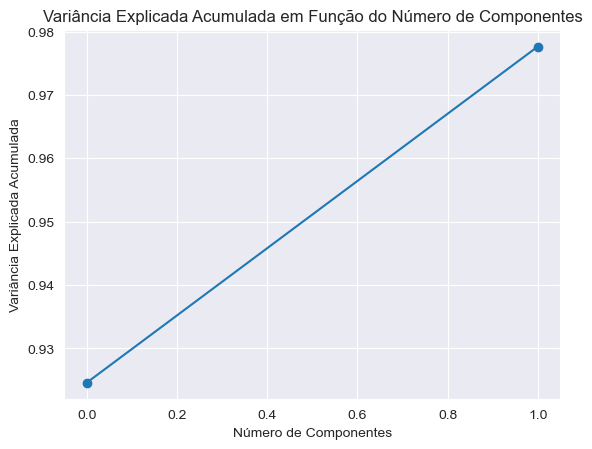

In [129]:
from matplotlib import pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada em Função do Número de Componentes')
plt.grid(True)
plt.show()

In [130]:
print(pca.singular_values_)

[25.08986398  6.00785254]


In [131]:
pca_data = pca.transform(X)

In [132]:
pca_data = pd.DataFrame(pca_data)
pca_data['target'] = dataframe['Name']
coluns_name  = {0:'PCA1',1:'PCA2'}
pca_data.rename(columns=coluns_name, inplace=True)

<Axes: xlabel='PCA1', ylabel='PCA2'>

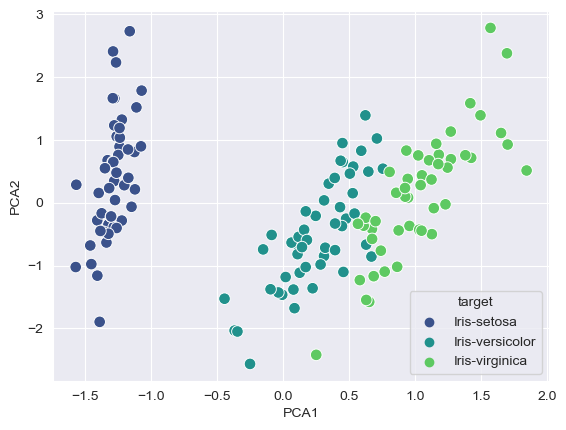

In [133]:
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=pca_data, palette='viridis', s=70)

Com o grafico do PCA podemos ver o quanto que a IS é diferente da IVe e da IVi, transformando um grafico que deveria ser de 4 dimensoes, apenas em 2 